In [5]:
import sys
import pandas as pd
import numpy as np
import math
import csv
from matplotlib import pyplot as plt

In [6]:
path = "C:/Users/Anne_/Downloads/output_1.txt"
df = pd.read_csv(path, sep='\t')
df = df[~((df['breastCancer'] == 0) & (df['noBreastCancer'] == 0))]
df


,chrom,sta,sto,symbol,breastCancer,noBreastCancer,TotalWindows
0,chr1,11873,14409,DDX11L1,0.0,5.0,3
1,chr1,14361,19759,WASH7P,0.0,15.0,3
2,chr1,14406,29370,WASH7P,0.0,17.0,4
4,chr1,69090,70008,OR4F5,0.0,5.0,1
5,chr1,134772,140566,RP11-34P13.14,0.0,11.0,3
...,...,...,...,...,...,...,...
30518,chr22,51174256,51176567,AC000036.4,7.0,6.0,2
30519,chr22,51176651,51183727,ACR,4.0,23.0,4
30520,chr22,51195513,51238065,RPL23AP82,2.0,53.0,22
30521,chr22,51205919,51222087,RABL2B,1.0,21.0,9


In [7]:
print(len(df[(df['breastCancer'] == 0)]))
print(len(df[(df['noBreastCancer'] == 0)]))

7728
53


In [8]:
df['breastCancer_div'] = df['breastCancer'] / 286
df['noBreastCancer_div'] = df['noBreastCancer'] / 1952

df['breastCancer_plus0.1'] = df['breastCancer_div'] + 0.1
df['noBreastCancer_plus0.1'] = df['noBreastCancer_div'] + 0.1
df['fc_plus0.1'] = df['breastCancer_plus0.1'] / df['noBreastCancer_plus0.1']

df['breastCancer_plus0.01'] = df['breastCancer_div'] + 0.01
df['noBreastCancer_plus0.01'] = df['noBreastCancer_div'] + 0.01
df['fc_plus0.01'] = df['breastCancer_plus0.01'] / df['noBreastCancer_plus0.01']

df['breastCancer_plus0.001'] = df['breastCancer_div'] + 0.001
df['noBreastCancer_plus0.001'] = df['noBreastCancer_div'] + 0.001
df['fc_plus0.001'] = df['breastCancer_plus0.001'] / df['noBreastCancer_plus0.001']


df['log2_fc_plus0.1'] = np.log2(df['fc_plus0.1'])
df['log2_fc_plus0.01']= np.log2(df['fc_plus0.01'])
df['log2_fc_plus0.001'] = np.log2(df['fc_plus0.001'])

df



,chrom,sta,sto,symbol,breastCancer,noBreastCancer,TotalWindows,breastCancer_div,noBreastCancer_div,breastCancer_plus0.1,...,fc_plus0.1,breastCancer_plus0.01,noBreastCancer_plus0.01,fc_plus0.01,breastCancer_plus0.001,noBreastCancer_plus0.001,fc_plus0.001,log2_fc_plus0.1,log2_fc_plus0.01,log2_fc_plus0.001
0,chr1,11873,14409,DDX11L1,0.0,5.0,3,0.000000,0.002561,0.100000,...,0.975025,0.010000,0.012561,0.796085,0.001000,0.003561,0.280783,-0.036489,-0.329006,-1.832475
1,chr1,14361,19759,WASH7P,0.0,15.0,3,0.000000,0.007684,0.100000,...,0.928639,0.010000,0.017684,0.565469,0.001000,0.008684,0.115149,-0.106810,-0.822479,-3.118431
2,chr1,14406,29370,WASH7P,0.0,17.0,4,0.000000,0.008709,0.100000,...,0.919887,0.010000,0.018709,0.534502,0.001000,0.009709,0.102997,-0.120472,-0.903734,-3.279325
4,chr1,69090,70008,OR4F5,0.0,5.0,1,0.000000,0.002561,0.100000,...,0.975025,0.010000,0.012561,0.796085,0.001000,0.003561,0.280783,-0.036489,-0.329006,-1.832475
5,chr1,134772,140566,RP11-34P13.14,0.0,11.0,3,0.000000,0.005635,0.100000,...,0.946654,0.010000,0.015635,0.639581,0.001000,0.006635,0.150710,-0.079091,-0.644802,-2.730150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,chr22,51174256,51176567,AC000036.4,7.0,6.0,2,0.024476,0.003074,0.124476,...,1.207635,0.034476,0.013074,2.636999,0.025476,0.004074,6.253549,0.272185,1.398897,2.644675
30519,chr22,51176651,51183727,ACR,4.0,23.0,4,0.013986,0.011783,0.113986,...,1.019710,0.023986,0.021783,1.101145,0.014986,0.012783,1.172359,0.028159,0.139005,0.229414
30520,chr22,51195513,51238065,RPL23AP82,2.0,53.0,22,0.006993,0.027152,0.106993,...,0.841460,0.016993,0.037152,0.457396,0.007993,0.028152,0.283927,-0.249034,-1.128485,-1.816409
30521,chr22,51205919,51222087,RABL2B,1.0,21.0,9,0.003497,0.010758,0.103497,...,0.934437,0.013497,0.020758,0.650177,0.004497,0.011758,0.382414,-0.097831,-0.621095,-1.386791


In [8]:
print(min(df['noBreastCancer_div']))
print(max(df['noBreastCancer_div']))

print(min(df['breastCancer_div']))
print(max(df['breastCancer_div']))



0.0
7.743852459016393
0.0
2.4545454545454546


(0.0, 750.0, 0.0, 20000.0)

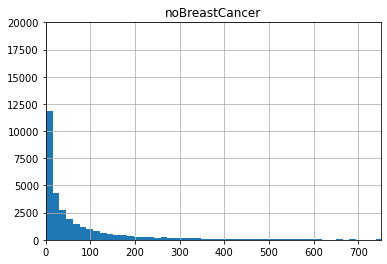

In [22]:
df.hist(column='noBreastCancer',bins=1000)
plt.axis([0, 750, 0, 20000])

(0.0, 100.0, 0.0, 20000.0)

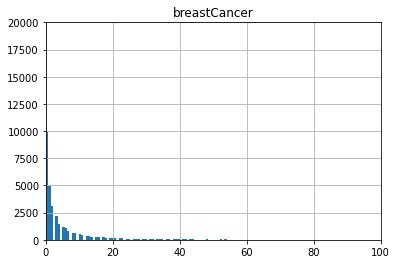

In [21]:
df.hist(column='breastCancer',bins=1000)
plt.axis([0, 100, 0, 20000])


In [5]:
print(min(df['noBreastCancer_div']))
print(max(df['noBreastCancer_div']))

print(min(df['breastCancer_div']))
print(max(df['breastCancer_div']))



0.0
7.743852459016393
0.0
2.4545454545454546


In [3]:
df['brestCancer_plus'] = df['breastCancer'] + (1/286)
df['noBreastCancer_plus'] = df['noBreastCancer'] + (1/1952)
df['breastCancer_div'] = df['brestCancer_plus'] / 286
df['noBreastCancer_div'] = df['noBreastCancer_plus'] / 1952
df['fc'] = df['breastCancer_div']/df['noBreastCancer_div']
df



,chrom,sta,sto,symbol,breastCancer,noBreastCancer,TotalWindows,brestCancer_plus,noBreastCancer_plus,breastCancer_div,noBreastCancer_div,fc
0,chr1,11873,14409,DDX11L1,0.0,5.0,3,0.003497,5.000512,0.000012,2.561738e-03,0.004772
1,chr1,14361,19759,WASH7P,0.0,15.0,3,0.003497,15.000512,0.000012,7.684689e-03,0.001591
2,chr1,14406,29370,WASH7P,0.0,17.0,4,0.003497,17.000512,0.000012,8.709279e-03,0.001404
3,chr1,34610,36081,FAM138A,0.0,0.0,0,0.003497,0.000512,0.000012,2.624463e-07,46.583011
4,chr1,69090,70008,OR4F5,0.0,5.0,1,0.003497,5.000512,0.000012,2.561738e-03,0.004772
...,...,...,...,...,...,...,...,...,...,...,...,...
31843,chr17_gl000205_random,116622,119732,MGC70870,0.0,0.0,0,0.003497,0.000512,0.000012,2.624463e-07,46.583011
31844,chr19_gl000209_random,7909,19472,KIR3DL3,0.0,0.0,0,0.003497,0.000512,0.000012,2.624463e-07,46.583011
31845,chr19_gl000209_random,21910,36449,KIR2DL2,0.0,0.0,0,0.003497,0.000512,0.000012,2.624463e-07,46.583011
31846,chr19_gl000209_random,86690,96246,KIR2DL5B,0.0,0.0,0,0.003497,0.000512,0.000012,2.624463e-07,46.583011


In [45]:
df = df[(df['breastCancer'] != df['noBreastCancer'])]
df['brestCancer_plus'] = df['breastCancer'] #+ 0.00001
df['noBreastCancer_plus'] = df['noBreastCancer'] #+ 0.00001
df['breastCancer_div'] = df['brestCancer_plus'] 
df['noBreastCancer_div'] = df['noBreastCancer_plus'] / (1952/286)
df['fc'] = df['breastCancer_div']/df['noBreastCancer_div']
df

C:\Users\Anne_\AppData\Local\Temp\ipykernel_20448\362315615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brestCancer_plus'] = df['breastCancer'] #+ 0.00001
C:\Users\Anne_\AppData\Local\Temp\ipykernel_20448\362315615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['noBreastCancer_plus'] = df['noBreastCancer'] #+ 0.00001
C:\Users\Anne_\AppData\Local\Temp\ipykernel_20448\362315615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,chrom,sta,sto,symbol,breastCancer,noBreastCancer,TotalWindows,brestCancer_plus,noBreastCancer_plus,breastCancer_div,noBreastCancer_div,fc
0,chr1,11873,14409,DDX11L1,0.0,5.0,3,0.0,5.0,0.0,0.732582,0.000000
1,chr1,14361,19759,WASH7P,0.0,15.0,3,0.0,15.0,0.0,2.197746,0.000000
2,chr1,14406,29370,WASH7P,0.0,17.0,4,0.0,17.0,0.0,2.490779,0.000000
4,chr1,69090,70008,OR4F5,0.0,5.0,1,0.0,5.0,0.0,0.732582,0.000000
5,chr1,134772,140566,RP11-34P13.14,0.0,11.0,3,0.0,11.0,0.0,1.611680,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
30518,chr22,51174256,51176567,AC000036.4,7.0,6.0,2,7.0,6.0,7.0,0.879098,7.962704
30519,chr22,51176651,51183727,ACR,4.0,23.0,4,4.0,23.0,4.0,3.369877,1.186987
30520,chr22,51195513,51238065,RPL23AP82,2.0,53.0,22,2.0,53.0,2.0,7.765369,0.257554
30521,chr22,51205919,51222087,RABL2B,1.0,21.0,9,1.0,21.0,1.0,3.076844,0.325008


In [46]:
fc_list = list()
for index, row in df.iterrows():
    if row['breastCancer'] == 0:
        print(row['breastCancer'], row['noBreastCancer'])
        new_fc = 0.000000000000001 / (row['noBreastCancer'] / (1952/286))
        fc_list.append(new_fc)
    elif row['noBreastCancer'] == 0:
        print(row['breastCancer'], row['noBreastCancer'])
        fc_list.append(row['breastCancer'])
    else:
        new_fc = row['breastCancer'] / (row['noBreastCancer'] / (1952/286))
        fc_list.append(new_fc)

df['fc2'] = fc_list
    

0.0 5.0
0.0 15.0
0.0 17.0
0.0 5.0
0.0 11.0
0.0 1.0
0.0 8.0
0.0 8.0
0.0 8.0
0.0 4.0
0.0 1.0
0.0 1.0
0.0 2.0
0.0 10.0
0.0 5.0
0.0 5.0
0.0 10.0
0.0 6.0
0.0 20.0
0.0 12.0
0.0 6.0
0.0 8.0
0.0 3.0
0.0 3.0
0.0 10.0
0.0 16.0
0.0 13.0
0.0 3.0
0.0 13.0
0.0 83.0
0.0 38.0
0.0 29.0
0.0 23.0
0.0 14.0
0.0 13.0
0.0 3.0
0.0 12.0
0.0 11.0
0.0 7.0
0.0 12.0
0.0 6.0
0.0 14.0
0.0 38.0
0.0 14.0
0.0 5.0
0.0 1.0
0.0 16.0
0.0 31.0
0.0 26.0
0.0 22.0
0.0 44.0
0.0 7.0
0.0 1.0
0.0 4.0
0.0 15.0
0.0 15.0
0.0 15.0
0.0 6.0
0.0 8.0
0.0 22.0
0.0 7.0
0.0 6.0
0.0 5.0
0.0 6.0
0.0 3.0
0.0 8.0
0.0 7.0
0.0 8.0
0.0 53.0
0.0 3.0
0.0 2.0
0.0 1.0
0.0 14.0
0.0 68.0
0.0 16.0
0.0 8.0
0.0 9.0
0.0 10.0
0.0 6.0
0.0 25.0
0.0 5.0
0.0 7.0
0.0 18.0
0.0 2.0
0.0 3.0
0.0 2.0
0.0 1.0
0.0 1.0
0.0 3.0
0.0 1.0
0.0 2.0
0.0 2.0
0.0 18.0
0.0 56.0
0.0 40.0
0.0 16.0
0.0 14.0
0.0 5.0
0.0 46.0
0.0 19.0
0.0 62.0
0.0 58.0
0.0 4.0
0.0 30.0
0.0 4.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 3.0
0.0 1.0
0.0 8.0
0.0 7.0
0.0 3.0
0.0 24.0
0.0 15.0
0.0 3.0
0.0 16.0
0.0 65.0
0.0

C:\Users\Anne_\AppData\Local\Temp\ipykernel_20448\2494260776.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fc2'] = fc_list


In [47]:
path = "C:/Users/Anne_/Downloads/cosmic_genes.csv"
df_cosmic = pd.read_csv(path, sep=';')
cosmic_genes = list(df_cosmic['Gene Symbol'])
tumor_types = list(df_cosmic['Tumour Types(Somatic)'])

In [48]:
gene_list = list(df['symbol'])
in_cosmic = list()
for gene in gene_list:
    if gene in cosmic_genes:
        print(gene)
        in_cosmic.append(True)
    else:
        in_cosmic.append(False)
df['cosmic_gene'] = in_cosmic
df

SKI
TNFRSF14
TNFRSF14
PRDM16
RPL22
CAMTA1
MTOR
PRDM2
CASP9
SPEN
SDHB
ARHGEF10L
PAX7
ID3
MDS2
ARID1A
LCK
SFPQ
SFPQ
THRAP3
CSF3R
MYCL
MPL
MUTYH
TAL1
TAL1
STIL
CDKN2C
EPS15
JUN
JAK1
FUBP1
BCL10
RPL5
RBM15
TRIM33
NRAS
ATP1A1
TENT5C
NOTCH2
PDE4DIP
BCL9
ARNT
SETDB1
MLLT11
S100A7
TPM3
MUC1
LMNA
LMNA
PRCC
NTRK1
FCRL4
SDHC
FCGR2B
DDR2
PBX1
PBX1
PRRX1
ABL2
TPR
CDC73
PTPRC
ELF3
BTG2
MDM4
SLC45A3
RGS7
FH
AKT3
MYCN
WDCP
NCOA1
DNMT3A
ASXL2
ALK
BIRC6
STRN
EML4
SIX2
EPAS1
MSH2
MSH6
FBXO11
BCL11A
BCL11A
REL
XPO1
PCBP1
DCTN1
CTNNA2
TMEM127
AFF3
RGPD3
RANBP2
PAX8
ERCC3
CXCR4
LRP1B
ACVR2A
ACVR1
HOXD13
HOXD11
NFE2L2
ITGAV
COL3A1
PMS1
SF3B1
CASP8
CD28
CREB1
IDH1
ERBB4
BARD1
ATIC
FEV
PAX3
ACSL3
CUL3
ACKR3
SRGAP3
FANCD2
VHL
PPARG
RAF1
FBLN2
XPC
TGFBR2
CCR4
MLH1
MYD88
CTNNB1
SETD2
NCKIPSD
RHOA
BAP1
PBRM1
CACNA1D
FHIT
MITF
FOXP1
ROBO2
EPHA3
TFG
CBLB
POLQ
GATA2
RPN1
CNBP
STAG1
PIK3CB
FOXL2
ATR
WWTR1
GMPS
MLF1
MECOM
TBL1XR1
PIK3CA
SOX2
MAP3K13
IGF2BP2
ETV5
EIF4A2
BCL6
LPP
TP63
MB21D2
MUC4
TFRC
FGFR3
NSD2
SLC34A2


C:\Users\Anne_\AppData\Local\Temp\ipykernel_20448\4129363273.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cosmic_gene'] = in_cosmic


,chrom,sta,sto,symbol,breastCancer,noBreastCancer,TotalWindows,brestCancer_plus,noBreastCancer_plus,breastCancer_div,noBreastCancer_div,fc,fc2,cosmic_gene
0,chr1,11873,14409,DDX11L1,0.0,5.0,3,0.0,5.0,0.0,0.732582,0.000000,1.365035e-15,False
1,chr1,14361,19759,WASH7P,0.0,15.0,3,0.0,15.0,0.0,2.197746,0.000000,4.550117e-16,False
2,chr1,14406,29370,WASH7P,0.0,17.0,4,0.0,17.0,0.0,2.490779,0.000000,4.014809e-16,False
4,chr1,69090,70008,OR4F5,0.0,5.0,1,0.0,5.0,0.0,0.732582,0.000000,1.365035e-15,False
5,chr1,134772,140566,RP11-34P13.14,0.0,11.0,3,0.0,11.0,0.0,1.611680,0.000000,6.204704e-16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,chr22,51174256,51176567,AC000036.4,7.0,6.0,2,7.0,6.0,7.0,0.879098,7.962704,7.962704e+00,False
30519,chr22,51176651,51183727,ACR,4.0,23.0,4,4.0,23.0,4.0,3.369877,1.186987,1.186987e+00,False
30520,chr22,51195513,51238065,RPL23AP82,2.0,53.0,22,2.0,53.0,2.0,7.765369,0.257554,2.575538e-01,False
30521,chr22,51205919,51222087,RABL2B,1.0,21.0,9,1.0,21.0,1.0,3.076844,0.325008,3.250083e-01,False


In [33]:
df.to_csv("C:/Users/Anne_/Downloads/output2.tsv", sep='\t', encoding='utf-8', index=False)

In [49]:
df = df.sort_values('fc2')

In [50]:
df

,chrom,sta,sto,symbol,breastCancer,noBreastCancer,TotalWindows,brestCancer_plus,noBreastCancer_plus,breastCancer_div,noBreastCancer_div,fc,fc2,cosmic_gene
6767,chr4,74269971,74287129,ALB,0.0,713.0,10,0.0,713.0,0.0,104.466189,0.000000,9.572475e-18,False
5435,chr3,75786028,75834255,ZNF717,0.0,246.0,25,0.0,246.0,0.0,36.043033,0.000000,2.774461e-17,False
13314,chr9,66457288,66469310,LINC01410,0.0,215.0,7,0.0,215.0,0.0,31.501025,0.000000,3.174500e-17,False
15473,chrY,4924130,5610264,PCDH11Y,0.0,173.0,134,0.0,173.0,0.0,25.347336,0.000000,3.945188e-17,False
15939,chr10,46993545,47000568,GPRIN2,0.0,153.0,5,0.0,153.0,0.0,22.417008,0.000000,4.460899e-17,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17236,chr11,30413503,30413591,Mir_633,2.0,1.0,1,2.0,1.0,2.0,0.146516,13.650350,1.365035e+01,False
20001,chr12,133127853,133131533,RP13-554M15.7,5.0,2.0,3,5.0,2.0,5.0,0.293033,17.062937,1.706294e+01,False
16381,chr10,92682487,92682592,RNU6-740P,3.0,1.0,1,3.0,1.0,3.0,0.146516,20.475524,2.047552e+01,False
14762,chrX,65896099,65896206,RNU6-394P,3.0,1.0,1,3.0,1.0,3.0,0.146516,20.475524,2.047552e+01,False


In [51]:
df.to_csv("C:/Users/Anne_/Downloads/output2_sort.tsv", sep='\t', encoding='utf-8', index=False)

In [52]:

df.head(20).to_csv("C:/Users/Anne_/Downloads/output2_sort_head.tsv", sep='\t', encoding='utf-8', index=False)

In [53]:

df.tail(20).to_csv("C:/Users/Anne_/Downloads/output2_sort_tail.tsv", sep='\t', encoding='utf-8', index=False)

In [54]:
df_true = df[df['cosmic_gene'] == True ]

df_true.head(20).to_csv("C:/Users/Anne_/Downloads/output2_sort_head_true.tsv", sep='\t', encoding='utf-8', index=False)

df_true.tail(20).to_csv("C:/Users/Anne_/Downloads/output2_sort_tail_true.tsv", sep='\t', encoding='utf-8', index=False)
df_true

,chrom,sta,sto,symbol,breastCancer,noBreastCancer,TotalWindows,brestCancer_plus,noBreastCancer_plus,breastCancer_div,noBreastCancer_div,fc,fc2,cosmic_gene
26924,chr19,3094407,3121454,GNA11,0.0,91.0,14,0.0,91.0,0.0,13.332992,0.000000,7.500192e-17,True
18750,chr12,7055739,7070479,PTPN6,0.0,61.0,8,0.0,61.0,0.0,8.937500,0.000000,1.118881e-16,True
18389,chr11,117014999,117041761,PAFAH1B2,0.0,61.0,14,0.0,61.0,0.0,8.937500,0.000000,1.118881e-16,True
26228,chr17,76987797,77005899,CANT1,0.0,51.0,10,0.0,51.0,0.0,7.472336,0.000000,1.338270e-16,True
12904,chr8,145736666,145743210,RECQL4,0.0,49.0,4,0.0,49.0,0.0,7.179303,0.000000,1.392893e-16,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,chr3,138663065,138665982,FOXL2,5.0,12.0,2,5.0,12.0,5.0,1.758197,2.843823,2.843823e+00,True
3204,chr2,45232323,45236542,SIX2,5.0,12.0,3,5.0,12.0,5.0,1.758197,2.843823,2.843823e+00,True
20904,chr14,38058756,38064325,FOXA1,11.0,26.0,3,11.0,26.0,11.0,3.809426,2.887574,2.887574e+00,True
20278,chr13,49280952,49283498,CYSLTR2,3.0,7.0,2,3.0,7.0,3.0,1.025615,2.925075,2.925075e+00,True
